# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = []
indices.append(data['Fresh'].argmax())
indices.append(data['Fresh'].argmin())
indices.append(data['Delicatessen'].argmax())

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

print("Chosen samples of wholesale customers dataset:")
display(samples)
print(data['Frozen'].mean())

Chosen samples of wholesale customers dataset:


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional ma

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,3,2920,6252,440,223,709
2,36847,43950,20170,36534,239,47943


3071.931818181818


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

**Index 0** : Large fresh market. I would say this as this item has the highest amount of fresh produce purchased and has a fresh amount nearly 10x that of the mean Whilst it's other values are in general below the average amounts

**Index 1** : A Small Grocer. I would estimate index 1 to be a small grocer as although it's  values are all well below the mean, it's grocery value is the maxium relative to it's own features.

**Index 2**: A large cafe / Deli. This is because it has the highest delicatessen value within the data set yet it also has values above average for Fresh, grocery and frozen.

I chose these 3 datasets by looking specifically for the min and max of certain feature sets. In doing so, it is clear that it is exceedingly hard to compare each sample to one another as each feature seems to ahve it's own scale, so that the fresh value of the first sample can't be compared to the delicatessen value of sample 2. This is a major problem as there may be many customers from all different categories (grocers, cafes, markets) that are of varying size and because of this varying size, we can't directly compare them easily.

However, we can look at the sample sets relatively easily in comparison to the means of each feature but once again, because the features are all on different scales, one can only compare each feature to it's own mean (i.e. frozen value to frozen mean). This does provide us with limited insight.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
cvs = data.std() / data.mean()
means = data.mean()
random_state =42

print("Means:")
display(means)
print("Co-efficient of variation:")
display(cvs)

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)
print(new_data.head())

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], random_state=random_state)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeClassifier()
regressor.fit(X_train, y_train)


# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
r2_score_test = r2_score(y_test, regressor.predict(X_test))

print("Mean Score:")
print(score)
print("R^2 score:")
print(r2_score_test)

Means:


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Co-efficient of variation:


Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

   Fresh  Milk  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     214              2674          1338
1   7057  9810    1762              3293          1776
2   6353  8808    2405              3516          7844
3  13265  1196    6404               507          1788
4  22615  5410    3915              1777          5185
Mean Score:
0.0
R^2 score:
-1.70544479871542


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** I attempted to predict the Delicatessen feature as it had the lowest mean and co-efficient of variation. This means that before feature scaling, The delicatessen feature would have been the most statistically insignificant because of it's low mean. I assumed that this would conversely make it one of the hardest features to therefore predict. I also chose it because it has the highest co-efficient of variation which was more important to me as this means that after adjusting every feature's variation / standard deviation to make them comparable by dividing them by their respective means, Delicatessen had the highest which implies that it's variation is the highest and has the biggest "spread" of data values. This means that the data values are therefore not concentrated and easier to predict on average.

Mean score was 0, R^2 score was -1.627.

The feature is necessary. As explained above, it is definitely the most nuanced / difficult feature to estimate. It also scored the most negative R^2 score of all of the above which implies that a simple horizontal line is a better fit for the above than our regressor. However, it's important to note that we picked a classifcation model (decision tree) instead of a multiple regression model to predict a continuos feature which is generally not advised.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


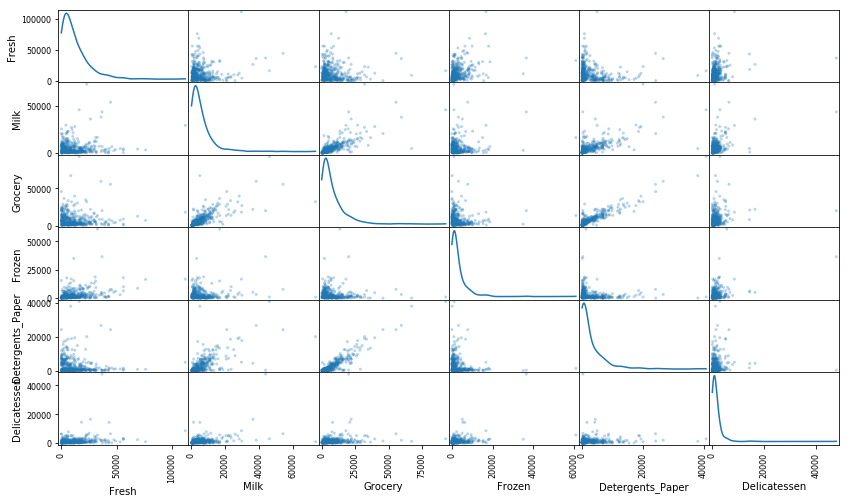

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


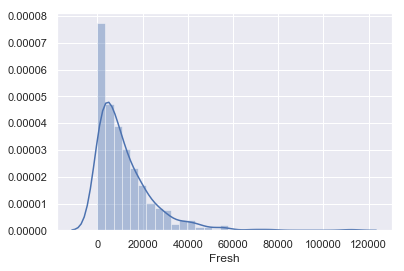

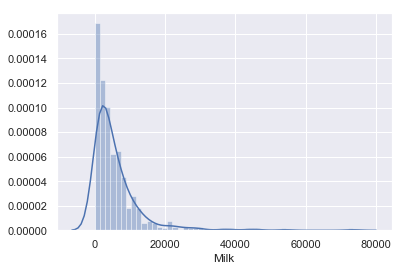

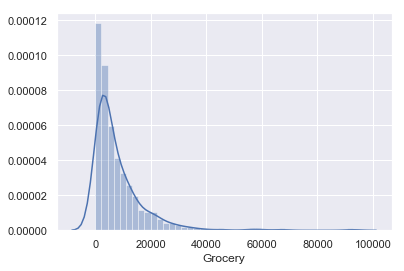

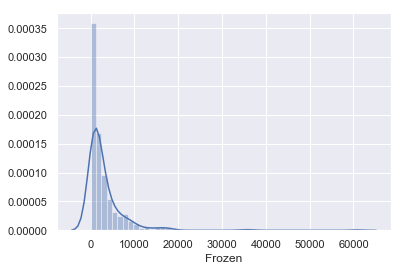

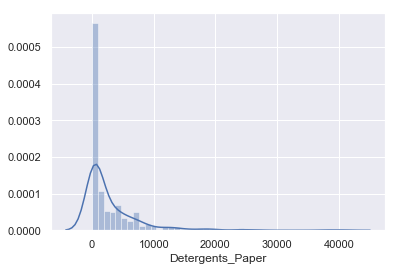

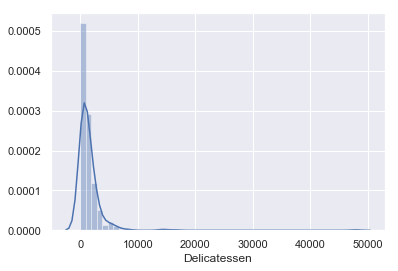

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = list(data)

sns.set(color_codes=True)

for feature in feature_names :
    plt.figure()
    sns.distplot(data[feature]);


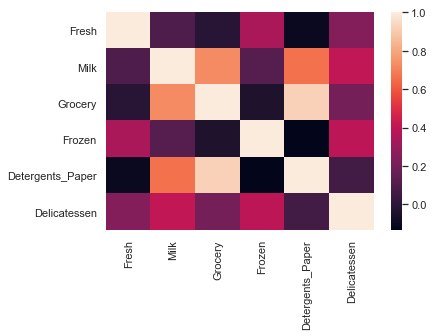

In [7]:
sns.heatmap(data.corr())

In [8]:
#code taken from https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
def get_subset_by_IQR(df,column):
    # Computing IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    return data.query("{2} < ({0} - 1.5 * {1}) | {2} > ({3} + 1.5 * {1})".format(Q1,IQR,column,Q3))[column]

outside_IQR_list={}
for feature_name in feature_names: 
    outside_IQR_list[feature_name] = get_subset_by_IQR(data, feature_name)
    
df = pd.DataFrame(data=outside_IQR_list)
display(df.describe())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,20.000000,28.000000,24.000000,43.000000,30.000000,27.000000
mean,51782.800000,27425.285714,36516.416667,13552.069767,16590.066667,8145.222222
std,17410.250893,13408.364454,16772.814689,9620.064534,7707.032717,8595.508994
min,38793.000000,15726.000000,23596.000000,7782.000000,9529.000000,4100.000000
25%,41914.250000,18491.000000,26708.250000,8656.000000,12080.000000,4907.000000
50%,45053.000000,22588.500000,29614.500000,10002.000000,13654.500000,5206.000000
75%,56082.250000,29693.250000,37288.000000,15215.000000,18828.000000,6659.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** None of the features looks normally distributed. They all seem to follow a lognormal distribution starting at 0. This makes sense as it's impossible to have a spend amount lower than 0. The lognormal distribution means that there are a large number of data points near 0 for a;ll features but this is especially true for frozen, delivatessen, detergent_papers indicating that these 3 fetures have the most points near 0.

Drawing the cumilitive distribution gives us a good idea of the actual distributions for each feature (all similar in shape with differing spreads / std. deviations. From the definition used in this cause, each feature would have a high amount of outliers or points oustide of 1,2,3 standard deviations away from the data if the data was normally distributed. This is what leads to the positive skewness of the graphs.

I have chosen to define outliers as points that are 1.5 times the inter quartile range away from the mean. This method is justified in that 1.5x the IQR should roughly be 3 std deviations. the mean plus or minus this value should equate to 99% of our data and this could loosely be defined as outlying data if there are a lot of points outside of this. see below image for explanation:

![title](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2012/03/iqr.jpg)

As can be seen in the above table, all features seem to contain outliers, Frozen being the highest. This is visible in the "bump" in the frozen distribution histogram, followed by detergents_paper which is also very visible.

According to the heatmap and scatter plot graphs, gorceries and detergent papers seem to be correlated together and milk and groceries seem to show the second strongest correlation. Because of these 2 links, there seems to also be a correlation between milk and detergent paper. It would be interesting to see if some sort of principal component is responsible for this correlations that makes up one type of shopper, something along the lines of "super market" or "every day shopping".

The heatmap confirms my suspicions on the relevant of the delicatessen feature as it is on average the most uncorrelated feature, indicating it can't be estimated easily based on one single other feature.

The delicatessen feature has a large number of values near 0, with 27 outliers with no strong correlation to any other feature.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


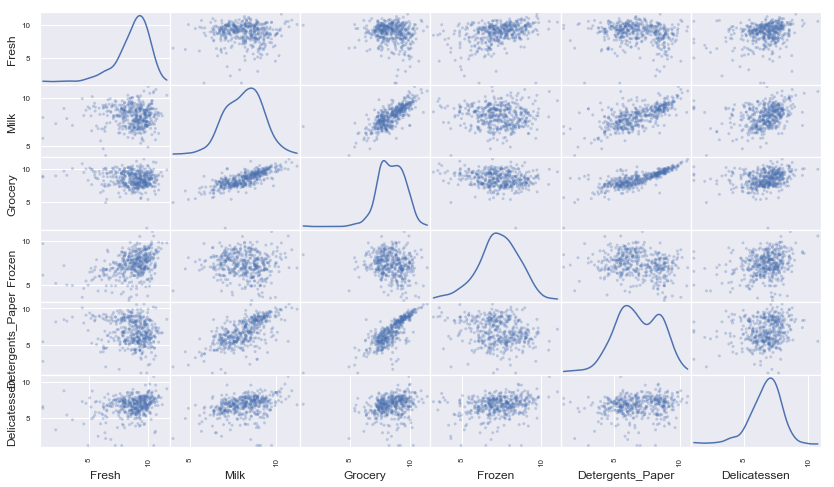

In [9]:

# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)


# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
2,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
feature_outliers = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    step_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display("Data points considered outliers for the feature '{}':".format(feature))
    display(step_outliers)
    outliers = outliers +  step_outliers.index.values.tolist()
    feature_outliers[feature] = step_outliers.index.values.tolist()

outliers = np.array(outliers)
display("outlier index list:")
display(outliers)

unique_elements, counts_elements = np.unique(outliers, return_counts=True)
outlier_frequency_array = pd.DataFrame(data={'index':unique_elements,'count':counts_elements})
single_outlier_indeces = outlier_frequency_array.loc[outlier_frequency_array['count'] == 1]['index']
multiple_outlier_indeces = outlier_frequency_array.loc[outlier_frequency_array['count'] > 1]['index']

display('single outliers:')
display(single_outlier_indeces)
display('multiple outliers:')
display(multiple_outlier_indeces)

# Remove the outliers, if any were specified
good_data_all_outliers = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data_single_outliers = log_data.drop(log_data.index[single_outlier_indeces]).reset_index(drop = True)
good_data_multiple_outliers = log_data.drop(log_data.index[multiple_outlier_indeces]).reset_index(drop = True)

data_list = {
    'no_outliers_data': good_data_all_outliers,
    'all_data': log_data,
    'no_unique_outliers': good_data_single_outliers,
    'no_non_unique_outlier': good_data_multiple_outliers
}
good_data = good_data_all_outliers


"Data points considered outliers for the feature 'Fresh':"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


"Data points considered outliers for the feature 'Milk':"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


"Data points considered outliers for the feature 'Grocery':"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


"Data points considered outliers for the feature 'Frozen':"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


"Data points considered outliers for the feature 'Detergents_Paper':"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


"Data points considered outliers for the feature 'Delicatessen':"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


'outlier index list:'

array([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
       355, 357, 412,  86,  98, 154, 356,  75, 154,  38,  57,  65, 145,
       175, 264, 325, 420, 429, 439,  75, 161,  66, 109, 128, 137, 142,
       154, 183, 184, 187, 203, 233, 285, 289, 343])

'single outliers:'

0      38
1      57
5      81
6      86
7      95
8      96
9      98
10    109
12    137
13    142
14    145
16    161
17    171
18    175
19    183
20    184
21    187
22    193
23    203
24    218
25    233
26    264
27    285
28    289
29    304
30    305
31    325
32    338
33    343
34    353
35    355
36    356
37    357
38    412
39    420
40    429
41    439
Name: index, dtype: int64

'multiple outliers:'

2      65
3      66
4      75
11    128
15    154
Name: index, dtype: int64

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** Yes, there are data points considered as outliers in multiple features as printed above. In total, there are 5 as per the table outputted above. They are with indeces:
*       65
*       66
*       75
*     128
*     154


A data point may be an outlier in multiple categories if:
1. There is an error in the data capture
2. They may be large spenders in a few categories
3. Maybe be small spenders in a few categories
4. May be specialists and spend large / small in one category because the do / don't specialise in that category

I have chosen to reduce all outliers for the following reasons:
1. After running the initial modelling, I will re-run it with both the single and multiple outliers to see if the results vary and if they are explainable.
2. There are only a few outliers relative to the number of data points after adjusting to a lognormal model in comparision to my previous calculation of outliers before applying a lognormal function.
3. Our results are not critical - it's okay to make a classification error.
4. the effect ton k-means clustering
5. The effect on PCA

Outliers have a very negative effect on K-means clustering for 2 reasons:
1. Local Minima solution: Depending on where we run an initial assignment on our clusters, a KMeans cluster can have different solutions indicating that it's a local minima problem. Keeping our outliers in may have a strange effect on our subsequent optimisation method that may lead to a solution that is not optimal and there is a higher probability of this happening keeping our outliers in.
2. Optimisation equation: Our clusters are optimised based on minimising the mean distance between each cluster. Keeping our outliers in negatively impacts our mean calculations which are done multiple times in this clustering method and may lead to suboptimal clusters.

Effect on PCA:
PCA uses a covariance matrix to determine the principal components which is very sensitive to outliers. The axis that PCA chooses for our principal component to exist on is that which has the maximum variance as to best reduce information loss. Therefore outliers, which increase variance, plays a strong role in determining our principal components and may negatively impact them.

The below results indicate that removing ALL outliers results in PCA being able to explain the most resulting variance. I would refactor the below and above in a method but for the sake of this notebook I haven't.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


no_outliers_data:


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


explained variance by first 2 PC's: 72.525290486636%
explained variance by first 4 PC's: 92.79536052307859%
all_data:


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4424,0.1737,-0.3945,-0.4544,0.1722,-0.7455,-0.1494
Dimension 2,0.2766,-0.6851,-0.1624,-0.0694,-0.4877,-0.0419,-0.5097
Dimension 3,0.1162,-0.6735,0.0331,-0.0322,0.2848,-0.2182,0.6446
Dimension 4,0.0962,-0.2143,0.0186,0.0645,0.8061,0.1901,-0.5135
Dimension 5,0.0458,-0.0008,0.7223,0.3480,-0.0362,-0.5637,-0.1954
Dimension 6,0.0229,-0.0293,0.5430,-0.8139,-0.0174,0.2024,-0.0228


explained variance by first 2 PC's: 71.89452317370726%
explained variance by first 4 PC's: 93.12958450547781%
no_unique_outliers:


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4916,0.1041,-0.4028,-0.4696,0.1217,-0.7519,-0.1620
Dimension 2,0.2472,-0.6326,-0.1274,-0.0707,-0.5808,0.0364,-0.4899
Dimension 3,0.0974,-0.7248,0.1512,-0.0313,0.2664,-0.2409,0.5673
Dimension 4,0.0918,0.2466,0.1091,0.0446,-0.7557,-0.2868,0.5214
Dimension 5,0.0458,0.0275,0.7182,0.3175,0.0588,-0.4891,-0.3742
Dimension 6,0.0262,0.0467,0.5206,-0.8190,-0.0482,0.2319,-0.0031


explained variance by first 2 PC's: 73.88138907644127%
explained variance by first 4 PC's: 92.79868300554672%
no_non_unique_outlier:


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


explained variance by first 2 PC's: 70.68172308068137%
explained variance by first 4 PC's: 93.10901099509614%


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


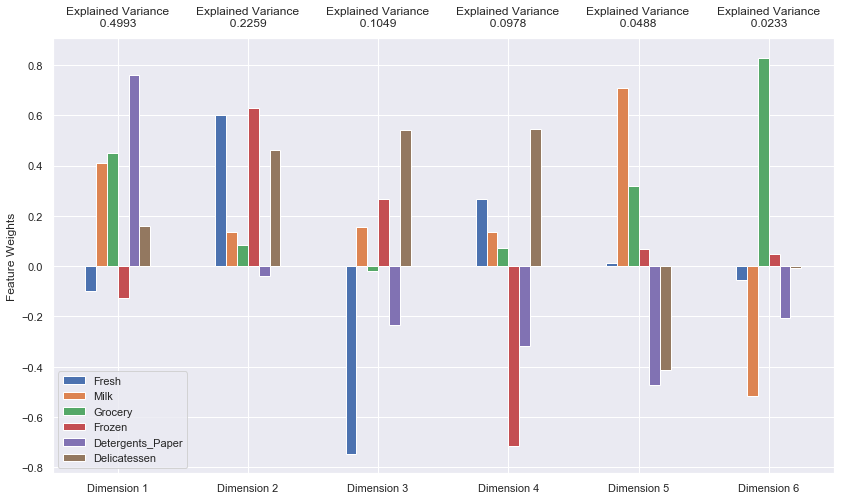

<Figure size 432x288 with 0 Axes>

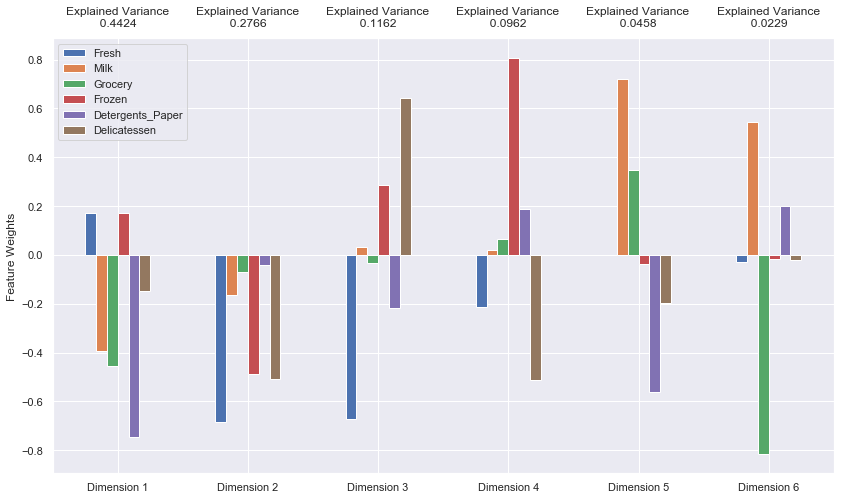

<Figure size 432x288 with 0 Axes>

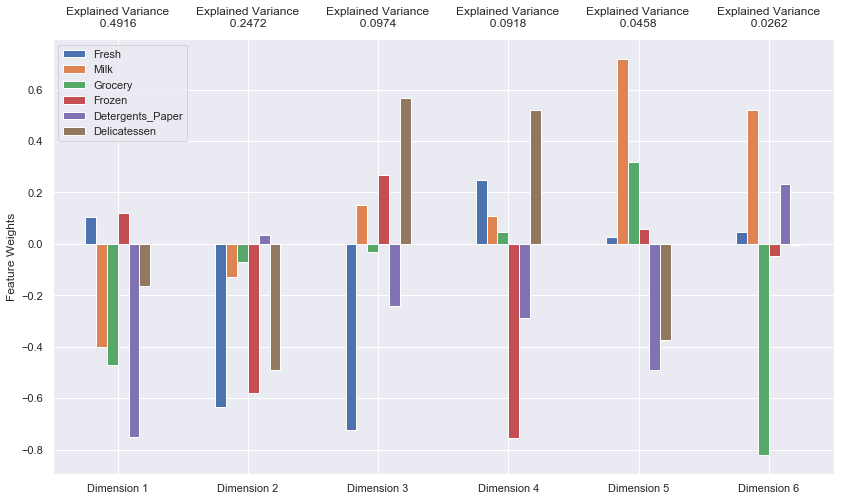

<Figure size 432x288 with 0 Axes>

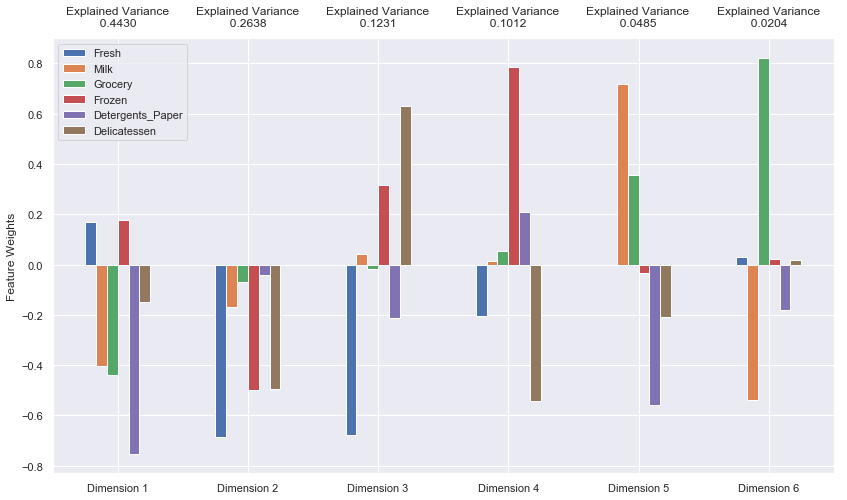

<Figure size 432x288 with 0 Axes>

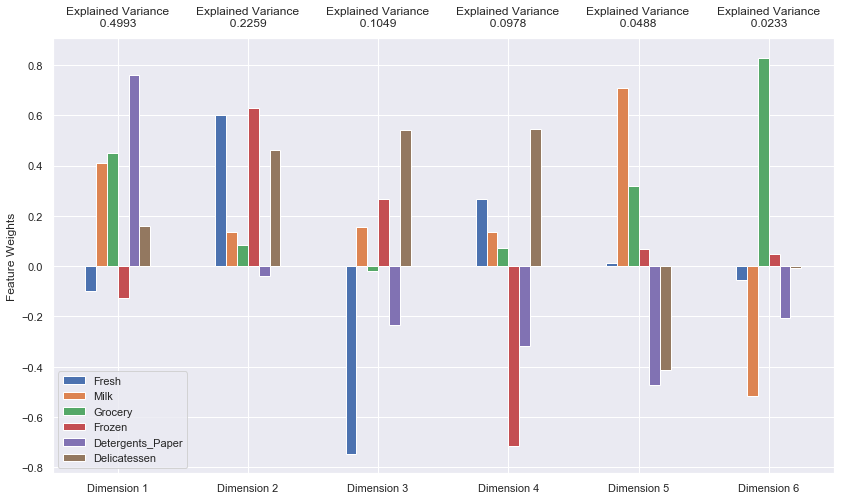

<Figure size 432x288 with 0 Axes>

In [50]:
from sklearn.decomposition import PCA

def PCA_process_line(data, samples) :
    pca = PCA()
    pca = pca.fit(data)
    pca_samples = pca.transform(samples)
    results = vs.pca_results(data, pca)
    plt.figure()

    return {'results': results,'pca': pca, 'pca_samples': pca_samples}

for list_name, data in data_list.items() :
    process_pipeline = PCA_process_line(data, log_samples)
    print("{}:".format(list_name))
    display(process_pipeline['results'])
    explained_var_2 = process_pipeline['pca'].explained_variance_ratio_[0] + process_pipeline['pca'].explained_variance_ratio_[1]
    explained_var_4 = explained_var_2 + process_pipeline['pca'].explained_variance_ratio_[2] + process_pipeline['pca'].explained_variance_ratio_[3]
    print("explained variance by first 2 PC's: {}%".format(explained_var_2*100))
    print("explained variance by first 4 PC's: {}%".format(explained_var_4*100))

pca_final = PCA_process_line(data_list['no_outliers_data'], log_samples)
pca_samples = pca_final['pca_samples']
pca_results = pca_final['results']


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** I have chosen to use the PCA I ran on the data with all outliers removed. That is the first output in the above.

explained variance by first 2 PC's: 0.72525290486636
explained variance by first 4 PC's: 0.9279536052307858
(see output from above for breakdown)

**First PC**: well represents Detergents paper, grocery and milk but poorly represents other features. This may be a customer who could be classified as a supermarket as they fit those categories well.

**Second PC**: Predominantly represents / made up of frozen which explains the most variance but is also positively impacted by fresh and delicatessen, however there are also small gains for milk and grocery but a negative impact from detergents paper. I would best describe this category to that of a restaurant due to the high fresh and speciality / delicatessen store but  low in general groceries, milk and negative in detergents.

**Third PC**: 



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [51]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.6240,4.4608,-0.2695,0.1618,0.4241,-0.3959
1,-0.0624,-5.6028,5.6472,-0.8222,0.5726,0.9912
2,0.8131,5.2596,2.4735,1.2656,1.4993,0.1986


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [52]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)


# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [53]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.6240,4.4608
1,-0.0624,-5.6028
2,0.8131,5.2596


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

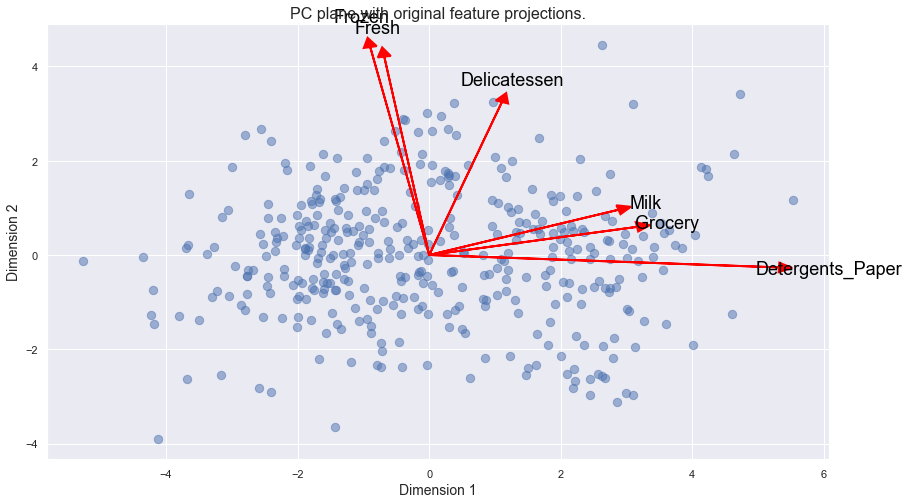

In [54]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

What are the advantages to using a K-Means clustering algorithm?

One key advantage of K-Means is it's scalability. Because the 2 major operations in the algorithm are the assignment and optimisation step. Both of these steps, particularly when we know / limit the number of iterations to run, are linear based functions with means that the overall scalability / time to complete is a function of O(n) making KMeans very advantageous when working with limited computational power and a large data set. It is also simple to use and implement as the theory / methodoly is fairly simple with no major assumptions barring that of the distribution of the points and constant variance leading to spherical clustering.

KMeans also tends to work well on data that doesn't resemble clear clusters / isn't normally distributed, for example a uniform distribution as it can still tell us which points are relatively closer together than others.

The main disadvatages of KMeans is that it lacks flexibility due to it's assumption of constant variance, leading to always spehrical clustering solutions and the fact that it does hard clustering which means that it's approach to classify information is not done in a probabilistic methodoly but rather a decision tree fashion. This leads to an outcome where a data point is either one or another but can't be somewhere in between which in many real life scenarios when using unlabelled data, is a very strong outcome / estimation to make.

What are the advantages to using a Gaussian Mixture Model clustering algorithm?

The advantages of Gaussian Mixture Model in contrast is a soft-clustering method. This means that all data points belong to every cluster but their is a probability associated to that data point belonging to each cluster. This allows us to give a more thorough interpretation on the classification of these data points as one data point could easily have a 70% probability of it being a "grocer" but also a 50% probability of it being a "cafe" where as KMeans would just tell us that this data point is strictly a grocer.

Another advantage of this method is the ability to produce non-spherical clusters by not assuming a constant variance between data points (we can adjust covariance). KMeans in a sense is a particular type of a GMM with specific input parameters. A disadvantage of GMM is that it does not perform as well as KMeans over big data sets as it is not a convex function and the solution finding algorithm / gradient descent is more complicated.


Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

I will use a GMM model as the data set, after visualising the biplot does seam to show 2 visible normal distributions however the desntiy of the data may suggest that there are some hidden features we don't fully see / understand. I therefore think a soft clustering approach would give us more and better information and that a normal distribution assumption won't be violated.

Because we only have 400 samples, I don't think that computational power is a consideration.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [55]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from operator import attrgetter



def GMMProcessPipeline(n_clusters, data, samples) :
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(data, preds)
    # TODO: Predict the cluster for each transformed sample data point
    sample_score = silhouette_score(pca_samples, sample_preds)

    
    return {'predictions': preds, 'sample_predictions': sample_preds, "score": score, "centers": centers, "n_clusters": n_clusters, 'model': clusterer, 'pca_sample_score': sample_score}

cluster_array = [2,3,4]
cluster_results = []
best_cluster_index = -1
for index, cluster_number in enumerate(cluster_array) :
    result = GMMProcessPipeline(cluster_number, reduced_data, pca_samples)
    print("clusters: {}, score: {}".format(cluster_number, result['score']))
    cluster_results.append(result)
    
    if(best_cluster_index == -1 or result["score"] > cluster_results[index]["score"]) :
        best_cluster_index = index

best_clusterer = cluster_results[best_cluster_index]
print("best cluster: {}, score: {}".format(best_clusterer["n_clusters"], best_clusterer["score"]))

preds = best_clusterer['predictions']
centers = best_clusterer['centers']
sample_preds = best_clusterer['sample_predictions']


clusters: 2, score: 0.446753526944537
clusters: 3, score: 0.3537547096300871
clusters: 4, score: 0.31710572801185666
best cluster: 2, score: 0.446753526944537


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** see above loop.

* clusters: 2, score: 0.446753526944537
* clusters: 3, score: 0.35203517453916794
* clusters: 4, score: 0.3052309430579893
* clusters: 5, score: 0.31356874310508004
* clusters: 6, score: 0.3167582947426264
* clusters: 7, score: 0.352883383450734
* clusters: 8, score: 0.3296990784864157
* clusters: 9, score: 0.31146662389505025
* clusters: 10, score: 0.2831451436665591
* best cluster: 2, score: 0.446753526944537

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

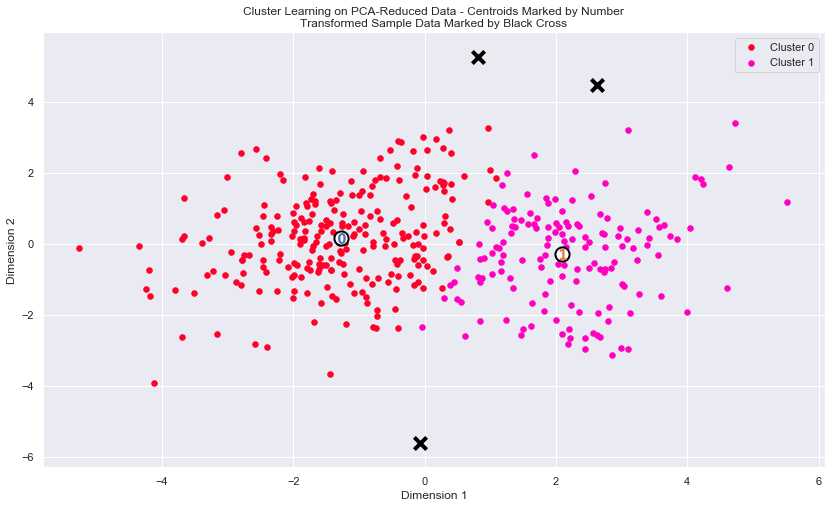

In [56]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [19]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0
Segment 1,9494.0,2049.0,2598.0,2203.0,337.0,796.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Segment 0 could represent a convenience store on the basis of it's values for groceries and detergents paper being far above that of those feature's means whilst it's other values being under or near the mean.

Segment 1 may represent a small restaurant due to it's close to / slightly below average mean values in the Fresh, Milk and Frozen.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [57]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

* Sample point 0 predicted to be in Cluster 1 (restaurant)
* Sample point 1 predicted to be in Cluster 1 (restaurant)
* Sample point 2 predicted to be in Cluster 0 (convenience store)

This is consistent with the segments described above. However, I chose all of my 3 points based on min / max values making them "fringe" cases due to the strength of the fresh feature which I minimised or maximised. As can be seen below, they are fairly difficult points to classify and whilst the above is clearly in line with the clustering predictions, it may be argued that they could fall into either category in real life.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

At a Macro level:
* We can't assume all changes affect all customers equally
* We could look at our 2 segments, try understand what type of customer the segments represent and try to make assumptions on those customers, such as: one may assume that a restaurant would need delivery 5 days a week on the basis that fresh product is of the utmost importance to the establishment whilst a convenience store, which stocks significantly less fresh produce and has more non-perishables may be happy to lower their delivery days to 3 from 4.

However, to determine which group of customers it affects the most, I would run an A/B test by selecting a sample of x customers very near to the mean of each cluster and to test with those segments. If the feedback was positive, I would scale out my sample testing in a similar fashion to the shape of the gaussian mixture model and increase my sample size until I am comfortable I can role thise out in either Segment 0 or segment 1 or both.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

They could:
* train a supervised classification learner such as Decision tree, SVC based on our existing data set
* we would train the model with goal of predicting the Segment (segment 0 or segment 1) that we just engineered in the above process
* after fitting and testing this model we would then use it to predict whether new customers fall into segment 0 or 1
* we would then use these predictions in conjuntion with the A/B test data from above to draw conclusions as to whether or not they would like a 3 or 5 day delivery service.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

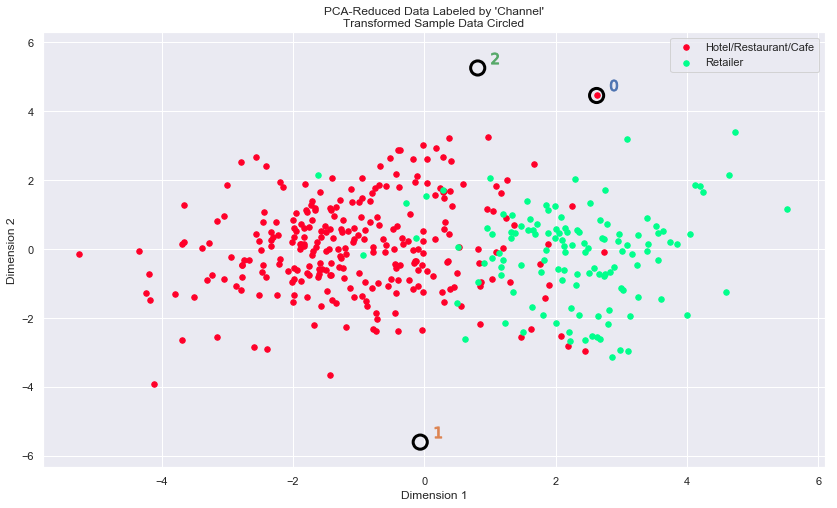

In [58]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* The clustering algorithm and number of clusters are very close to the distribution shown here. Both on the face that their are 2 clusters and 2 categories shown above and the distribution of these categories is similar to that predicted by the GMM above.
* In the above visualisation and based on the feature labels once given, YES as we are given these specific classification labels above. However, when we don't know the labels and as mentioned earlier, GMM is a soft clusterer, this means that every point belongs to every cluster with a probability associated to it so I would argue no. In comparing GMM to the above, it's clear that the red points represent segment 0 (convenience store) and green points represent segment 1 (restaurant)
* I would consider the convenience store to be similar, however not the restaurant classification.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.